In [1]:
!pip install numpy
!pip install pandas

## **IMPORTING THE DATASET**

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",delimiter='\t')


In [3]:
#DISPLAYING THE DATSET

df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### **Data Cleaning**

In [4]:
#FINDING OUT THE MISSING VALUES

missing_values = df.isnull().sum()

print(missing_values)

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


In [5]:
#DELETING THE 'choice_description' COLUMN AND SAVING IT TO NEW DATAFRAME
df_cleaned = df.dropna(axis=1)

In [6]:
df_cleaned

,order_id,quantity,item_name,item_price
0,1,1,Chips and Fresh Tomato Salsa,$2.39
1,1,1,Izze,$3.39
2,1,1,Nantucket Nectar,$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,$2.39
4,2,2,Chicken Bowl,$16.98
...,...,...,...,...
4617,1833,1,Steak Burrito,$11.75
4618,1833,1,Steak Burrito,$11.75
4619,1834,1,Chicken Salad Bowl,$11.25
4620,1834,1,Chicken Salad Bowl,$8.75


In [7]:
#INCORPORATING THE CHANGES INTO ACTUAL DATASET
df=df_cleaned
df

,order_id,quantity,item_name,item_price
0,1,1,Chips and Fresh Tomato Salsa,$2.39
1,1,1,Izze,$3.39
2,1,1,Nantucket Nectar,$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,$2.39
4,2,2,Chicken Bowl,$16.98
...,...,...,...,...
4617,1833,1,Steak Burrito,$11.75
4618,1833,1,Steak Burrito,$11.75
4619,1834,1,Chicken Salad Bowl,$11.25
4620,1834,1,Chicken Salad Bowl,$8.75


In [8]:
#DATATYPES OF TGHE COLUMNS
df.dtypes


order_id       int64
quantity       int64
item_name     object
item_price    object
dtype: object

In [9]:
#REMOVING THE '$' AND BLANK SPACE FROM item_price COLUMN AND MAKING IT FLOAT DATATYPE

df['item_price'] = df['item_price'].astype(str)
df['item_price'] = df['item_price'].str.replace('$', '', regex=False)
df['item_price'] = df['item_price'].str.replace(' ', '')
df['item_price'] = df['item_price'].astype(float)
df.dtypes

<ipython-input-9-af7772881272>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item_price'] = df['item_price'].astype(str)
<ipython-input-9-af7772881272>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item_price'] = df['item_price'].str.replace('$', '', regex=False)
<ipython-input-9-af7772881272>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

order_id        int64
quantity        int64
item_name      object
item_price    float64
dtype: object

In [10]:
#REMOVING " and " FROM item_name COLUMN

df['item_name'] = df['item_name'].astype(str)
def split_orders(text):
    if " and " in text:
        return text.split(" and ")
    else:
        return [text]

#split_orders(df['item_name'][3])

df['item_name']=df['item_name'].apply(split_orders)
df

<ipython-input-10-2b22487b625b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item_name'] = df['item_name'].astype(str)
<ipython-input-10-2b22487b625b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item_name']=df['item_name'].apply(split_orders)


,order_id,quantity,item_name,item_price
0,1,1,"[Chips, Fresh Tomato Salsa]",2.39
1,1,1,[Izze],3.39
2,1,1,[Nantucket Nectar],3.39
3,1,1,"[Chips, Tomatillo-Green Chili Salsa]",2.39
4,2,2,[Chicken Bowl],16.98
...,...,...,...,...
4617,1833,1,[Steak Burrito],11.75
4618,1833,1,[Steak Burrito],11.75
4619,1834,1,[Chicken Salad Bowl],11.25
4620,1834,1,[Chicken Salad Bowl],8.75


# Data Exploration

In [11]:
print(df.describe())

#UNIQUE NUMBER OF ITEMS IN item_name
unique_items_count = df['item_name'].explode().nunique()
print("\n\nNumber of unique items:", unique_items_count)

#IDENTIFYING MOST POPULAR ITEMS

most_popular_items = df['item_name'].explode().value_counts().head(10)
print("\n\nMost popular items:")
print(most_popular_items)

          order_id     quantity   item_price
count  4622.000000  4622.000000  4622.000000
mean    927.254868     1.075725     7.464336
std     528.890796     0.410186     4.245557
min       1.000000     1.000000     1.090000
25%     477.250000     1.000000     3.390000
50%     926.000000     1.000000     8.750000
75%    1393.000000     1.000000     9.250000
max    1834.000000    15.000000    44.250000


Number of unique items: 50


Most popular items:
item_name
Chips                 983
Chicken Bowl          726
Chicken Burrito       553
Guacamole             479
Steak Burrito         368
Canned Soft Drink     301
Steak Bowl            211
Bottled Water         162
Chicken Soft Tacos    115
Chicken Salad Bowl    110
Name: count, dtype: int64


# Data Transformation

In [12]:
#ADDING A COLUMN NAMED 'total_amount'

df_test=df

df_test['total_amount']=df_test['quantity']*df_test['item_price']
#df_test
df=df_test
df

,order_id,quantity,item_name,item_price,total_amount
0,1,1,"[Chips, Fresh Tomato Salsa]",2.39,2.39
1,1,1,[Izze],3.39,3.39
2,1,1,[Nantucket Nectar],3.39,3.39
3,1,1,"[Chips, Tomatillo-Green Chili Salsa]",2.39,2.39
4,2,2,[Chicken Bowl],16.98,33.96
...,...,...,...,...,...
4617,1833,1,[Steak Burrito],11.75,11.75
4618,1833,1,[Steak Burrito],11.75,11.75
4619,1834,1,[Chicken Salad Bowl],11.25,11.25
4620,1834,1,[Chicken Salad Bowl],8.75,8.75


In [32]:
#CALCULATING THE REVENUE FOR EACH ITEM

#calculating occurances of a particular item

item_count = df['item_name'].value_counts()
revenue=pd.DataFrame(item_count)
df_test['item_name'] = df_test['item_name'].apply(lambda x: str(x))
amount=df_test[['total_amount','item_name']].drop_duplicates(subset=['item_name'])

#merging the amount and revenue dataframes


revenue = pd.merge(revenue,amount,on='item_name')

#calculating the total revenue for each item
revenue['total_Revenue'] = revenue['count'] * revenue['total_amount']
revenue=revenue.drop(columns=['total_amount'])
revenue


,item_name,count,total_Revenue
0,['Chicken Bowl'],726,24654.96
1,['Chicken Burrito'],553,4694.97
2,"['Chips', 'Guacamole']",479,2131.55
3,['Steak Burrito'],368,4324.00
4,['Canned Soft Drink'],301,376.25
5,['Steak Bowl'],211,1896.89
6,['Chips'],211,453.65
7,['Bottled Water'],162,176.58
8,['Chicken Soft Tacos'],115,1006.25
9,"['Chips', 'Fresh Tomato Salsa']",110,262.90


# **Data Transformation**

In [34]:
#IMPORTING MATPLOTLIB
import matplotlib.pyplot as plt

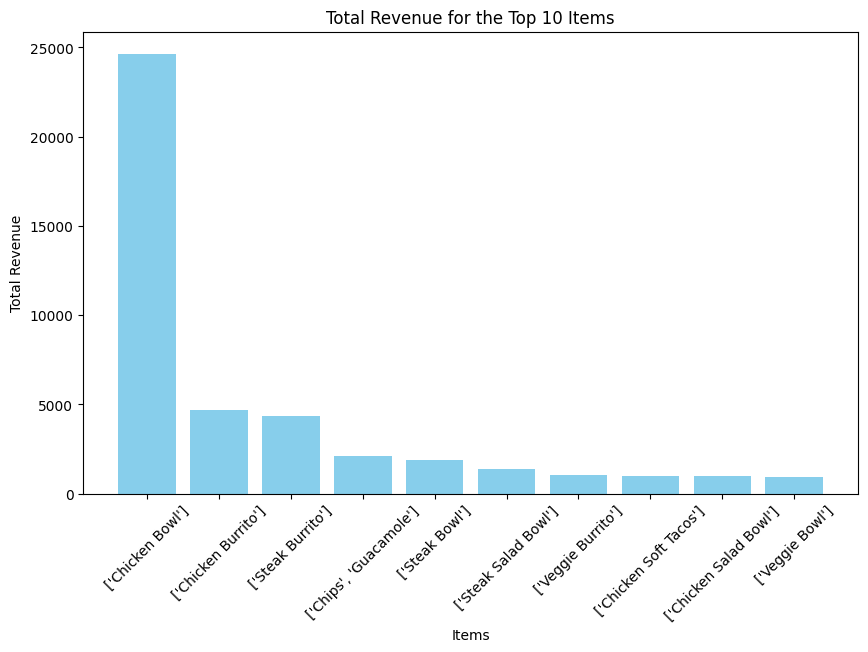

In [35]:
#PLOTTING TOTAL REVENUE FOR THE TOP 10 ITEMS


#sorting the dataframe
revenue = revenue.sort_values(ascending=False,by='total_Revenue')

#PLOTTING THE GRAPH

#choosing top 10 products
top_10_items = revenue.head(10)

#Plot the total revenue for the top 10 items
plt.figure(figsize=(10, 6))
plt.bar(top_10_items['item_name'], top_10_items['total_Revenue'], color='skyblue')
plt.xlabel('Items')
plt.ylabel('Total Revenue')
plt.title('Total Revenue for the Top 10 Items')
plt.xticks(rotation=45)
plt.show()

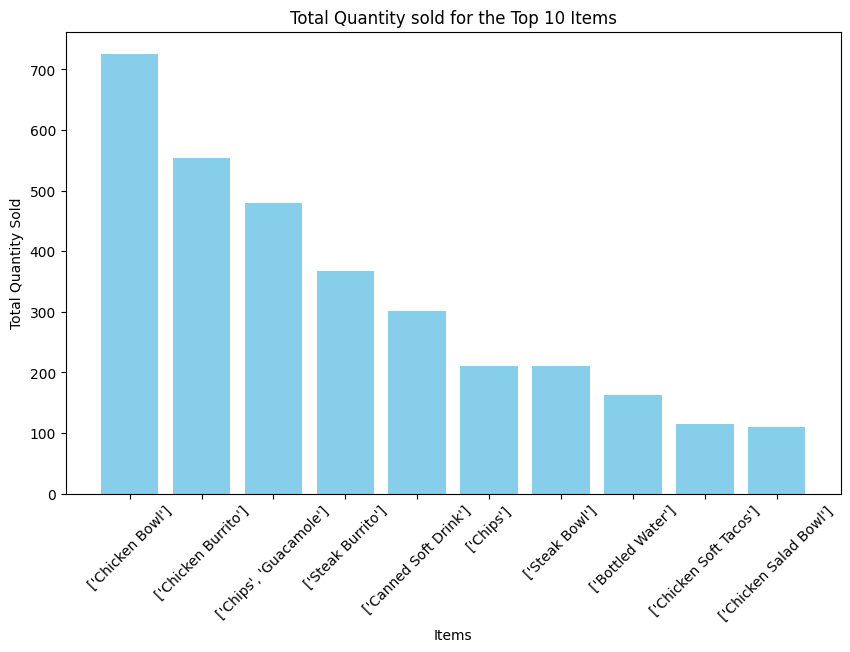

In [36]:
#QUANTITY SOLD FOR TOP 10 ITEMS


#sorting the dataframe
revenue = revenue.sort_values(ascending=False,by='count')

#PLOTTING THE GRAPH

#choosing top 10 products
top_10_items = revenue.head(10)

#Plot the total revenue for the top 10 items
plt.figure(figsize=(10, 6))
plt.bar(top_10_items['item_name'], top_10_items['count'], color='skyblue')
plt.xlabel('Items')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity sold for the Top 10 Items')
plt.xticks(rotation=45)
plt.show()


# **Advanced Analysis**

In [38]:
#CALCULATING AVERAGE PRICE OF ORDER


average_price = df['total_amount'].mean()

print("Average Price:", average_price)


#CALCULATING AVERAGE NUMBER OF ITEMS PER ORDER


average_quantity = df['quantity'].mean()
print("Average Number of Items:", average_quantity)

Average Price: 8.48918649935093
Average Number of Items: 1.0757247944612722


In [49]:
#saving the updates in original dataset

df=df_test

#saving the file in google drive
df.to_csv('/content/drive/MyDrive/JKTech_Exercise/sales_dataset.csv')
